<a href="https://colab.research.google.com/github/tanvirparvez04/demo/blob/main/rice-yield-prediction/tanvir%20/1-curation/pannel_data_(multi_reg_to_one_reg_line)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd

In [5]:
filepath = "/content/drive/MyDrive/project rice/code and pic/BD rice.xlsx"

In [6]:
df_aman = pd.read_excel(filepath, sheet_name='Aman',skiprows=1)

# **scaling using min max**

<ipython-input-9-e76a857cdb67>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adistrict[cols_to_scale] = scaler.fit_transform(df_adistrict[cols_to_scale])


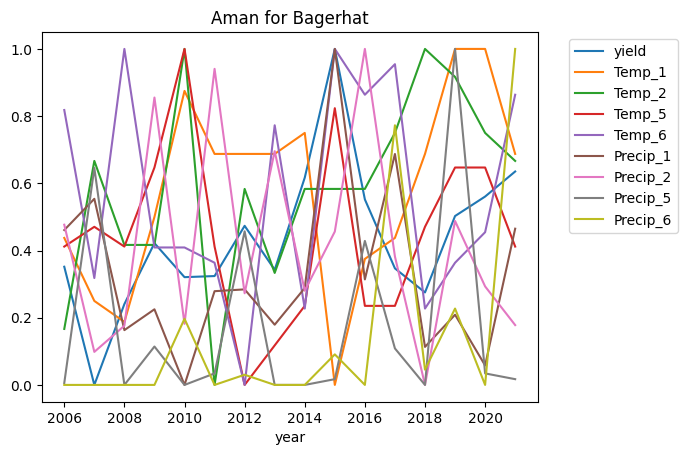

In [9]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def process_a_district_for_aman(district_name):
    df_adistrict = df_aman[df_aman['District'] == district_name]
    # print(df_adistrict.shape)
    # print(df_adistrict['year'].values)
    cols_to_scale = ['yield', 'Temp_1', 'Temp_2', 'Temp_5', 'Temp_6', 'Precip_1', 'Precip_2', 'Precip_5', 'Precip_6']
    # Apply Min-Max scaling to normalize the values
    scaler = MinMaxScaler()
    df_adistrict[cols_to_scale] = scaler.fit_transform(df_adistrict[cols_to_scale])

    res = df_adistrict.plot(x='year', y=cols_to_scale, title = "Aman for " + district_name)



    # df_adistrict.style.set_title(district_name)
    res.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    #output_path = os.path.join(outplot_dir_for_aman, f"Aman_for_{district_name}.pdf")
    # print(output_path)
    #res.figure.savefig(output_path, bbox_inches="tight")
    # Close the plot to prevent it from displaying
    #plt.close(res.figure)
process_a_district_for_aman("Bagerhat")


# **Combining Multiple Regression Lines into a Single Regression Line in Panel Data Analysis**

In [ ]:
!pip install linearmodels

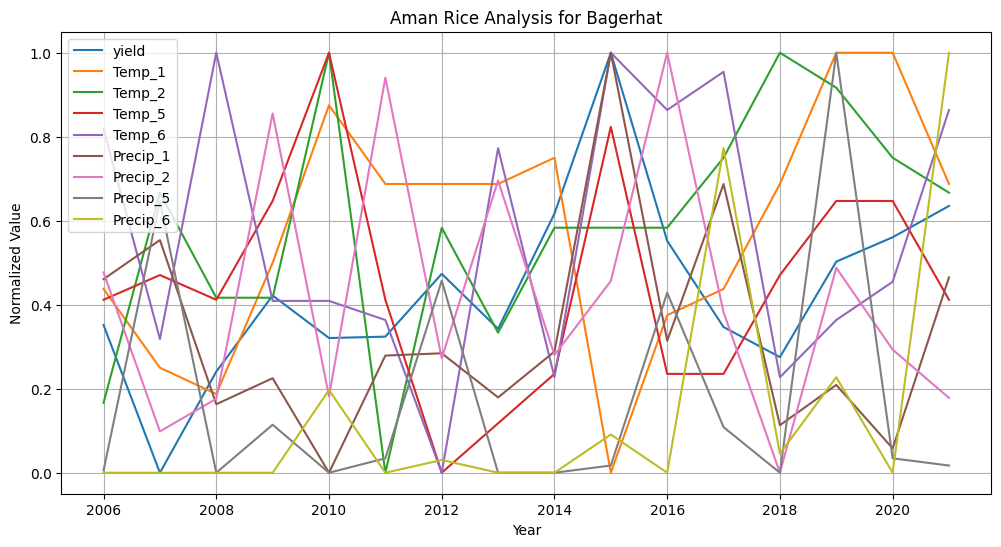

Rice                 object
year                  int64
District             object
weather district     object
Division             object
yield               float64
Precip_1            float64
Precip_2            float64
Precip_5            float64
Precip_6            float64
Temp_1              float64
Temp_2              float64
Temp_5              float64
Temp_6              float64
Precip_1 Squared    float64
Precip_2 Squared    float64
Precip_5 Squared    float64
Precip_6 Squared    float64
Temp_1 Squared      float64
Temp_2 Squared      float64
Temp_5 Squared      float64
Temp_6 Squared      float64
Price               float64
Trend92               int64
D_AUS                 int64
D_AMAN                int64
Fertilizer price    float64
dtype: object
Index(['Rice', 'year', 'District', 'weather district', 'Division', 'yield',
       'Precip_1', 'Precip_2', 'Precip_5', 'Precip_6', 'Temp_1', 'Temp_2',
       'Temp_5', 'Temp_6', 'Precip_1 Squared', 'Precip_2 Squared',
       'Prec

FactorEvaluationError: Unable to evaluate factor `yield`. [NameError: `yield` is not present in the dataset or evaluation context.]

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import statsmodels.formula.api as smf
from linearmodels import RandomEffects
from statsmodels.regression.mixed_linear_model import MixedLM

# Load the Excel file
filepath = "/content/drive/MyDrive/project rice/code and pic/BD rice.xlsx"
df = pd.read_excel(filepath)


# Ensure columns are clean and properly named
df.columns = df.columns.str.strip()

# Filter the data for Aman rice
df_aman = pd.read_excel(filepath, sheet_name='Aman',skiprows=1)
df_aman.columns = df_aman.columns.str.strip()

# Function to process and plot normalized data for a district
def process_a_district_for_aman(district_name):
    df_adistrict = df_aman[df_aman['District'] == district_name]

    # Select columns for plotting
    cols = ['yield', 'Temp_1', 'Temp_2', 'Temp_5', 'Temp_6', 'Precip_1', 'Precip_2', 'Precip_5', 'Precip_6']

    # Apply Min-Max scaling to normalize the values
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_adistrict[cols]),
                             columns=cols,
                             index=df_adistrict.index)

    # Add the year column back
    df_scaled['year'] = df_adistrict['year']

    # Create the plot
    plt.figure(figsize=(12, 6))
    for col in cols:
        plt.plot(df_scaled['year'], df_scaled[col], label=col)

    plt.title(f"Aman Rice Analysis for {district_name}")
    plt.xlabel("Year")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

# Process and visualize data for Bagerhat district
process_a_district_for_aman("Bagerhat")

# Check data types and column names
print(df.dtypes)
print(df.columns)



# ----------- Random Effects Model -----------
from linearmodels.panel import RandomEffects
random_effects_model = RandomEffects.from_formula('yield ~ Temp_1 + Temp_2 + Temp_5 + Temp_6', data=df)
result_random_effects = random_effects_model.fit()

# Output: Random Effects Model Summary
print("\nRandom Effects Model Summary:")
print(result_random_effects.summary())

# -----------  Mixed Effects Model (Random Intercepts for Districts) -----------
model_mixed_effects = MixedLM.from_formula('yield ~ Temp_1 + Temp_2 + Temp_5 + Temp_6', groups='District', data=df)
result_mixed_effects = model_mixed_effects.fit()
print("\nMixed Effects Model Summary:")
print(result_mixed_effects.summary())

# ----------- Visualization for All Methods -----------

# Predict values for all models

df['predicted_yield_random'] = result_random_effects.predict(df)
df['predicted_yield_mixed'] = result_mixed_effects.predict(df)

# Plot the actual vs predicted yield for each method
plt.figure(figsize=(12, 8))

# Actual yield as dots
sns.scatterplot(x=df['year'], y=df['yield'], label='Actual Yield', color='blue', alpha=0.5)


# Random Effects
plt.plot(df['year'], df['predicted_yield_random'], label='Random Effects', color='purple', linestyle='--')

# Mixed Effects
plt.plot(df['year'], df['predicted_yield_mixed'], label='Mixed Effects', color='orange', linestyle='--')

# Add titles and labels
plt.title('Year vs Yield with Different Aggregated Regression Methods')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
